In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit import setup_logging, style

import matplotlib.pyplot as plt
plt.style.use(style.notebook)

import numpy as np

In [3]:
setup_logging()

In [4]:
redshift = 0.55
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
b1 = 2.0

cat = LogNormalCatalog(Plin=Plin, nbar=3e-4, BoxSize=1380., Nmesh=256, bias=b1, seed=42)

[ 000001.79 ]   0: 09-27 13:54  LogNormalCatalog INFO     Growth Rate is 0.770123
[ 000001.79 ]   0: 09-27 13:54  LogNormalCatalog INFO     Generating whitenoise
[ 000004.30 ]   0: 09-27 13:54  LogNormalCatalog INFO     Write noise generated
[ 000005.32 ]   0: 09-27 13:54  LogNormalCatalog INFO     Displacement computed in fourier space
[ 000005.81 ]   0: 09-27 13:54  LogNormalCatalog INFO     Overdensity computed in configuration space: std = 1.1929580837889608
[ 000007.12 ]   0: 09-27 13:54  LogNormalCatalog INFO     Displacement computed in configuration space: std = [4.238011674174512, 4.235169508603116, 4.313347332404491]
[ 000007.13 ]   0: 09-27 13:54  LogNormalCatalog INFO     gaussian field is generated
[ 000007.22 ]   0: 09-27 13:54  LogNormalCatalog INFO     Lognormal transformation done
[ 000008.34 ]   0: 09-27 13:54  LogNormalCatalog INFO     Poisson sampling done, total number of objects is 788095
[ 000013.92 ]   0: 09-27 13:54  LogNormalCatalog INFO     catalog produced. 

In [5]:
# add RSD
line_of_sight = [0,0,1]
cat_r = cat
cat_r['RSDPosition'] = cat['Position'] + cat['VelocityOffset'] * line_of_sight

In [6]:
cat.to_mesh(resampler='cic', Nmesh=256, compensated=True, position='RSDPosition')

(LogNormalCatalog(seed=42, bias=2) as CatalogMesh)

In [7]:
# convert to a MeshSource, using TSC interpolation on 256^3 mesh
mesh   =   cat.to_mesh(resampler='cic', Nmesh=256, compensated=True, position='RSDPosition')
mesh_r = cat_r.to_mesh(resampler='cic', Nmesh=256, compensated=True, position='RSDPosition')

In [8]:
# compute the power, specifying desired linear k-binning
r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.001)
r_r = FFTPower(mesh_r, mode='1d', dk=0.005, kmin=0.001)
P3D = r.power
P3D_r = r_r.power

[ 000028.08 ]   0: 09-27 13:55  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 788095 


[ 000028.55 ]   0: 09-27 13:55  CatalogMesh     INFO     painted 788095 out of 788095 objects to mesh
[ 000028.56 ]   0: 09-27 13:55  CatalogMesh     INFO     painted 788095 out of 788095 objects to mesh
[ 000028.56 ]   0: 09-27 13:55  CatalogMesh     INFO     mean particles per cell is 0.0469741
[ 000028.56 ]   0: 09-27 13:55  CatalogMesh     INFO     sum is 788095 
[ 000028.57 ]   0: 09-27 13:55  CatalogMesh     INFO     normalized the convention to 1 + delta
[ 000028.79 ]   0: 09-27 13:55  CatalogMesh     INFO     field: (LogNormalCatalog(seed=42, bias=2) as CatalogMesh) painting done
[ 000029.29 ]   0: 09-27 13:55  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 788095 
[ 000029.57 ]   0: 09-27 13:55  CatalogMesh     INFO     painted 788095 out of 788095 objects to mesh
[ 000029.58 ]   0: 09-27 13:55  CatalogMesh     INFO     painted 788095 out of 788095 objects to mesh
[ 000029.58 ]   0: 09-27 13:55  CatalogMesh     INFO     mean particles per cell is 0.0469741
[ 000029.58 ]   0: 09-

(0.01, 0.6)

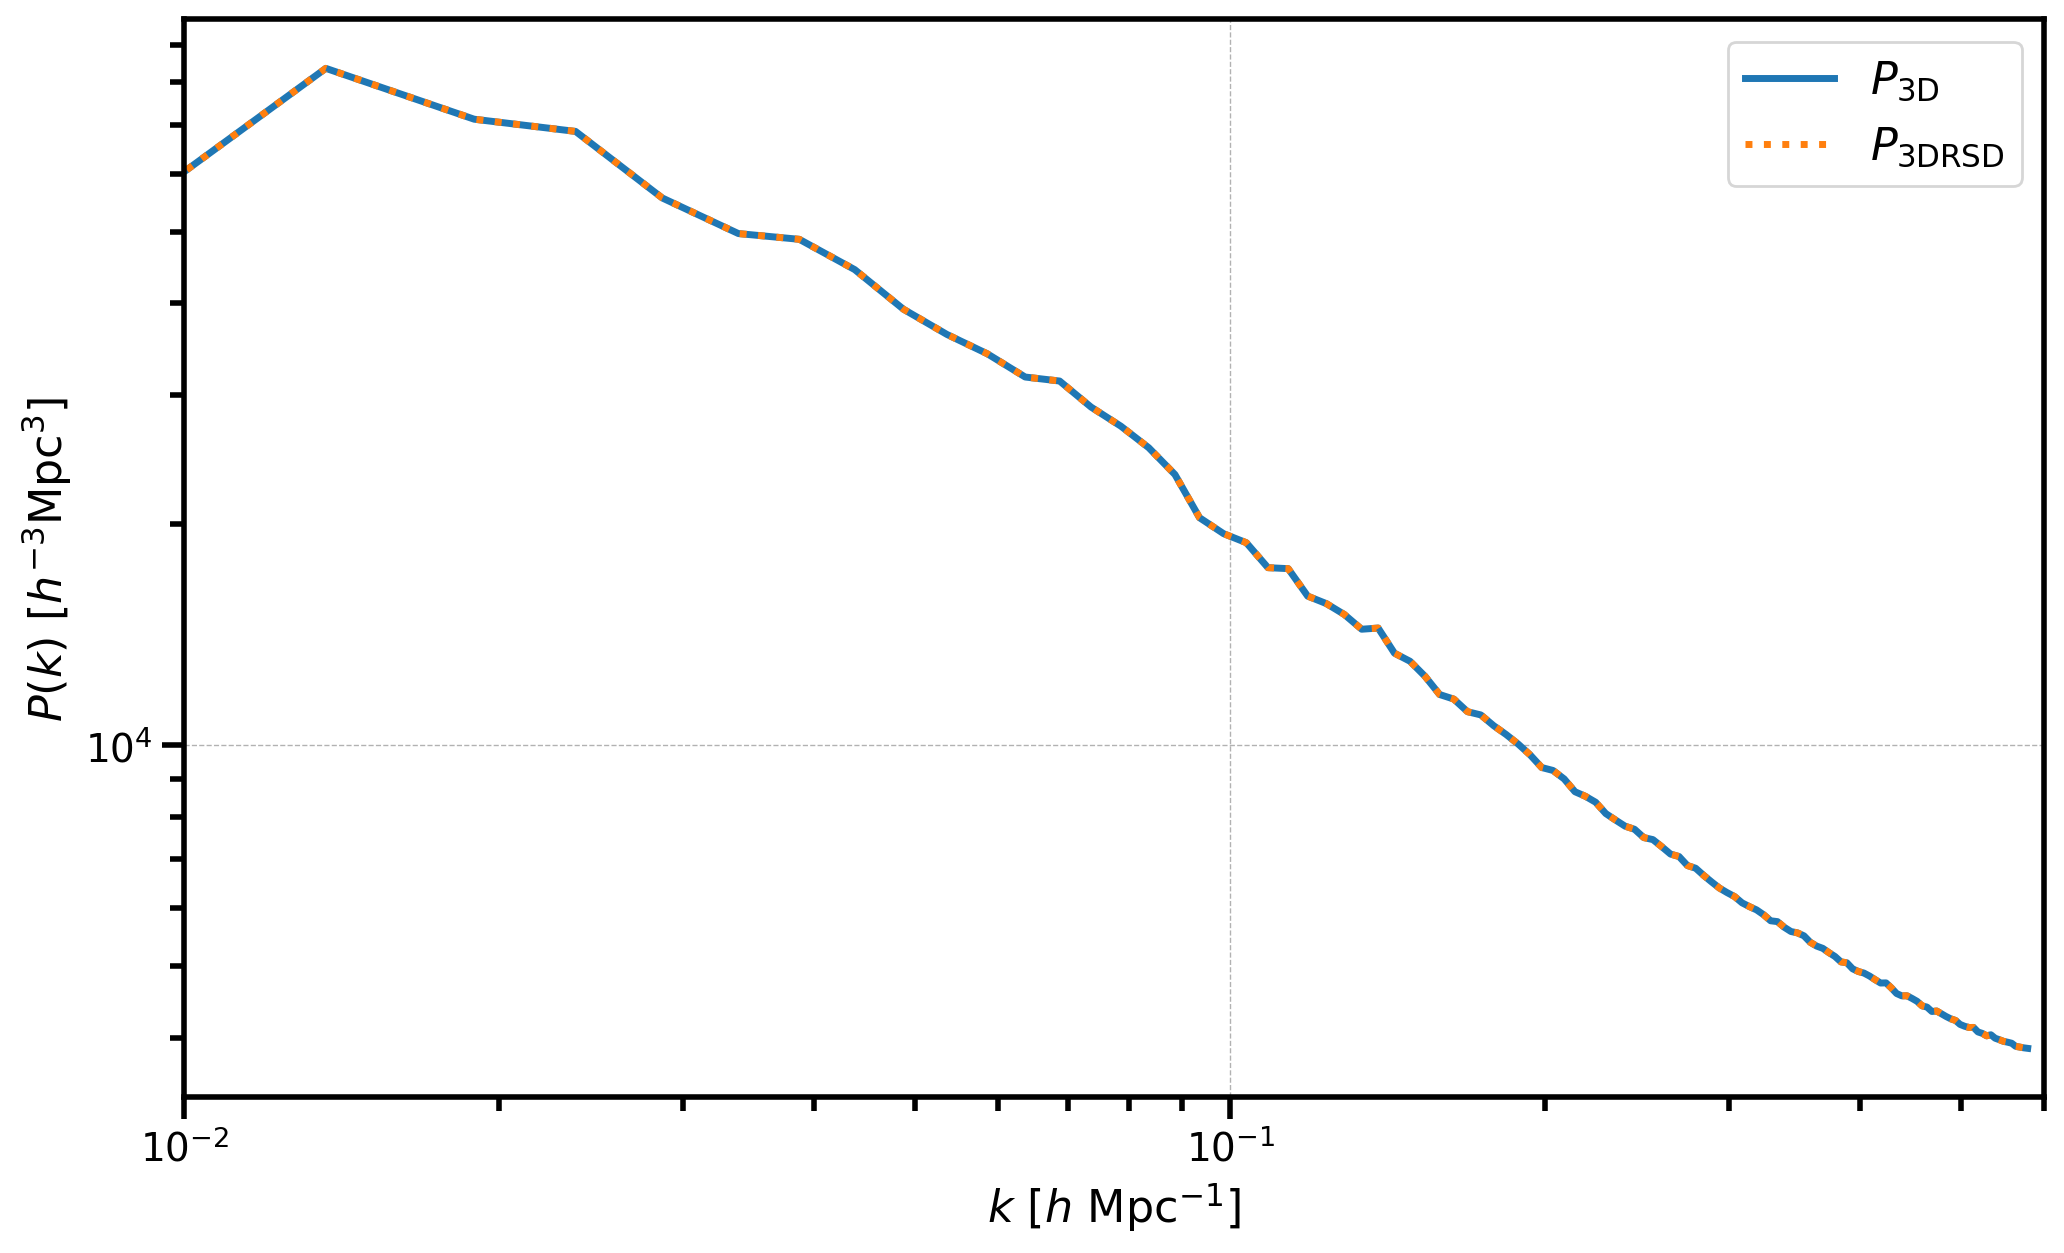

In [30]:
plt.loglog(P3D['k'], P3D['power'].real, label=r"$P_\mathrm{3D}$")
plt.loglog(P3D_r['k'], P3D_r['power'].real, label=r"$P_\mathrm{3D RSD}$", linestyle="dotted")

# format the axes
plt.legend(loc=0)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)

In [12]:
fiducial_vals = {
    'Ob'  : 0.3175,
    'Ob2' : 0.3175,
    'Om'  : 0.049,
    'h'   : 0.6711,
    'n_s' : 0.9624,
    'ns'  : 0.9624,
    's_8' : 0.834,
    's8'  : 0.834,
    'Mnu' : 0,
    'w'   : -1
}

In [11]:
cosmo_nbk = cosmology.Cosmology(h=fiducial_vals["h"],
                                sigma8=fiducial_vals["s8"],
                                #Omega0_b=fiducial_vals["Ob"],
                                Omega0_cdm = fiducial_vals["Om"],
                                n_s=fiducial_vals["ns"],
                                # m_ncdm=fiducial_vals["Mnu"]
                                )